# How are in-demand skills trending for Data Analysts?

Methology:

1. Aggregate skill counts monthly
2. Reanalyze based on percentage of total jobs
3. Plot the monthly skill demand

In [8]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [25]:
# filter the data: data analyst and Hungary
df_DA_HU = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Hungary')].copy()

# extract month number from job posted date
df_DA_HU['job_posted_month_no'] = df_DA_HU['job_posted_date'].dt.month

# explode job skills column
df_DA_HU_exploded = df_DA_HU.explode('job_skills')

# pivot
df_DA_HU_pivot = df_DA_HU_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# add total row
df_DA_HU_pivot.loc['Total'] = df_DA_HU_pivot.sum()

# sort values based on totals
df_DA_HU_pivot = df_DA_HU_pivot[df_DA_HU_pivot.loc['Total'].sort_values(ascending=False).index]

# drop total row
df_DA_HU_pivot = df_DA_HU_pivot.drop('Total')

df_DA_HU_pivot

job_skills,sql,excel,python,tableau,power bi,sap,r,vba,oracle,azure,...,splunk,symphony,svn,nltk,npm,perl,php,pyspark,pytorch,notion
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,44,24,18,25,20,9,9,6,8,...,0,0,0,0,0,0,0,0,1,0
2,39,33,21,18,21,15,10,3,5,6,...,0,1,0,0,0,0,0,0,0,0
3,31,26,17,11,14,6,6,7,3,2,...,1,0,0,0,0,0,0,1,0,0
4,22,37,21,15,9,10,9,7,3,4,...,0,0,0,0,0,0,0,0,0,0
5,33,21,15,10,12,11,6,5,6,8,...,0,0,1,0,0,0,0,0,0,1
6,37,24,21,20,19,13,8,2,8,6,...,0,0,0,0,0,0,0,0,0,0
7,30,22,18,16,11,6,7,2,4,1,...,0,0,0,0,0,0,0,0,0,0
8,19,16,16,15,9,6,8,3,4,0,...,0,0,0,0,0,0,0,0,0,0
9,11,4,8,5,5,3,4,3,1,3,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# calculate total posting per month
DA_totals = df_DA_HU.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     108
2      83
3      61
4      60
5      59
6      67
7      47
8      38
9      19
10     44
11     23
12     30
dtype: int64

In [31]:
# calculate percentages
df_DA_HU_percent = df_DA_HU_pivot.div(DA_totals/100, axis=0)

df_DA_HU_percent

job_skills,sql,excel,python,tableau,power bi,sap,r,vba,oracle,azure,...,splunk,symphony,svn,nltk,npm,perl,php,pyspark,pytorch,notion
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,36.111111,40.740741,22.222222,16.666667,23.148148,18.518519,8.333333,8.333333,5.555556,7.407407,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.925926,0.000000
2,46.987952,39.759036,25.301205,21.686747,25.301205,18.072289,12.048193,3.614458,6.024096,7.228916,...,0.000000,1.204819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,50.819672,42.622951,27.868852,18.032787,22.950820,9.836066,9.836066,11.475410,4.918033,3.278689,...,1.639344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.639344,0.000000,0.000000
4,36.666667,61.666667,35.000000,25.000000,15.000000,16.666667,15.000000,11.666667,5.000000,6.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,55.932203,35.593220,25.423729,16.949153,20.338983,18.644068,10.169492,8.474576,10.169492,13.559322,...,0.000000,0.000000,1.694915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.694915
6,55.223881,35.820896,31.343284,29.850746,28.358209,19.402985,11.940299,2.985075,11.940299,8.955224,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,63.829787,46.808511,38.297872,34.042553,23.404255,12.765957,14.893617,4.255319,8.510638,2.127660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,50.000000,42.105263,42.105263,39.473684,23.684211,15.789474,21.052632,7.894737,10.526316,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,57.894737,21.052632,42.105263,26.315789,26.315789,15.789474,21.052632,15.789474,5.263158,15.789474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


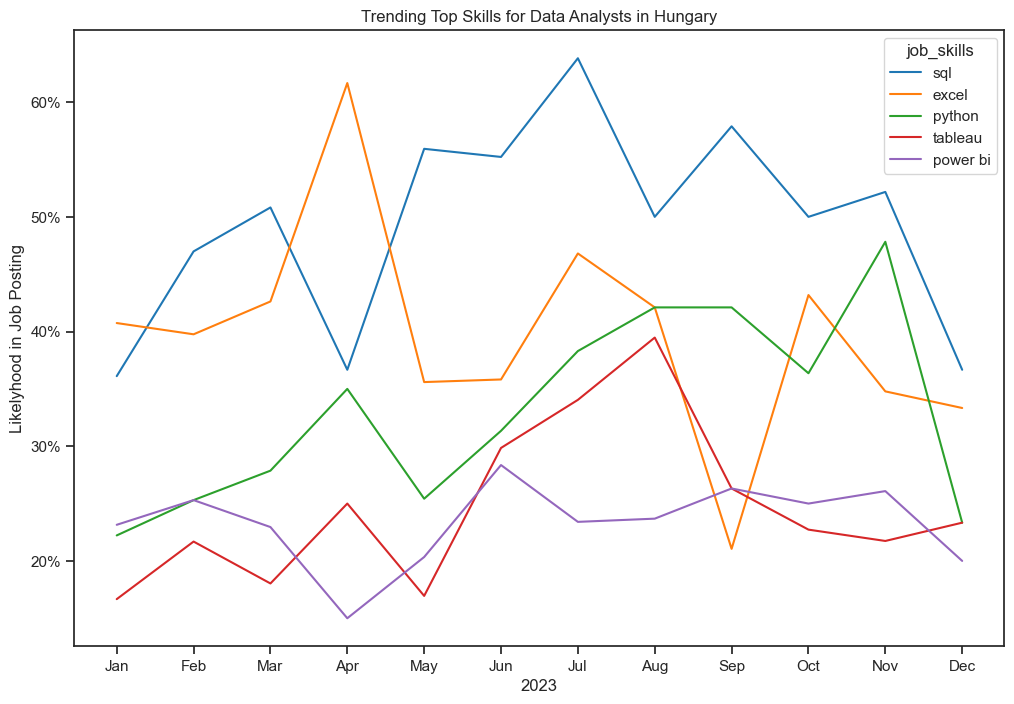

In [65]:
# plotting the top 5 skills
df_plot = df_DA_HU_percent.iloc[:, :5]
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Analysts in Hungary')
plt.ylabel('Likelyhood in Job Posting')
plt.xlabel('2023')
plt.xticks(ticks=range(1, 13), labels=xtick_labels)

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.show()
